In [1]:
import numpy as np
import pandas as pd
import statistics as st
import matplotlib.pyplot as plt

from terminal_optimization import container_objects
from terminal_optimization import container_defaults
from terminal_optimization import container_system

plt.style.use('seaborn-darkgrid')

# 0. Prepare inputs

In [2]:
startyear = 2020
lifecycle = 10

## 0.1 Generate demand forecast scenario

In [3]:
years = list(range(startyear, startyear+lifecycle))

demand = []
for year in years:
    if year < 2026:
        demand.append(200_000)
    else:
        demand.append(600_000)

scenario_data={'year': years, 'volume': demand}

# ladens
container_defaults.container_data['historic_data'] = []
container = container_objects.Commodity(**container_defaults.container_data)
container.scenario_data = pd.DataFrame(data=scenario_data)

# combine
demand = [container]


# plot scenarios 
if False:
    laden.plot_demand()

   
    

## 0.2 Generate vessels

In [4]:
# instantiate vessels
handysize = container_objects.Vessel(**container_defaults.handysize_data)
handymax = container_objects.Vessel(**container_defaults.handymax_data)
panamax = container_objects.Vessel(**container_defaults.panamax_data)


vessels = [handysize, handymax, panamax] 


# 1. Instatiate terminal system

In [ ]:
Terminal = container_system.System(startyear = startyear, 
                         lifecycle = lifecycle, 
                         elements = demand + vessels, 
                         operational_hours = 7665,   # example Wijnand
                         debug=True,
                         crane_type_defaults=container_defaults.sts_crane_data, 
                         storage_type_defaults=container_defaults.silo_data)

# 2. Start simulation
Develop terminal given the throughput scenario and investment triggers implemented

In [ ]:
Terminal.simulate()


Simulate year: 2020
  Total vessel calls: 67
     Handysize calls: 0
     Handymax calls: 0
     Panamax calls: 67
  Total cargo volume: 200000
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned

  Start analysis:
     Berth occupancy planned (@ start of year): inf
     Berth occupancy online (@ start of year): inf
     Crane occupancy planned (@ start of year): inf
     Crane occupancy online (@ start of year): inf
     waiting time factor (@ start of year): inf
     waiting time occupancy (@ start of year): inf
  *** add Berth to elements
     Berth occupancy planned (after adding berth): inf
     Berth occupancy online (after adding berth): inf
  *** add Quay to elements
     Berth occupancy planned (after adding quay): inf
     Berth occupancy onli

     Empty stack capacity planned (@ start of year): 480
     Empty stack capacity online (@ start of year): 480
     Empty stack capacity required (@ start of year): 268.69682042095843
     Empty ground slots required (@ start of year): 44.78280340349307
     OOG slots planned (@ start of year): 100
     OOG slots online (@ start of year): 100
     OOG slots required (@ start of year): 67.41497286547343
     Number of stack equipment online (@ start of year): 10
     Gate capacity planned (@ start of year): 180
     Gate capacity online (@ start of year): 180
     Service rate planned (@ start of year): 0.9778798076923075
     Gate lane minutes  (@ start of year): 176.01836538461535
     Empty handlers online (@ start of year): 10

Simulate year: 2023
  Total vessel calls: 67
     Handysize calls: 0
     Handymax calls: 0
     Panamax calls: 67
  Total cargo volume: 200000
     a total of 1 Berth_01 is online; 1 total planned
     a total of 1 Quay_01 is online; 1 total planned
     a

  *** add tractor to elements
  *** add tractor to elements
  *** add tractor to elements
  *** add tractor to elements
  *** add tractor to elements
  *** add tractor to elements
  *** add tractor to elements
  *** add tractor to elements
  *** add tractor to elements
  *** add tractor to elements
  *** add tractor to elements
  *** add tractor to elements
     Stack capacity planned (@ start of year): 3840
     Stack capacity online (@ start of year): 3840
     Stack capacity required (@ start of year): 10907.210031347962
     Total laden and reefer ground slots required (@ start of year): 2726.8025078369906
  *** add stack to elements
     Empty stack capacity planned (@ start of year): 480
     Empty stack capacity online (@ start of year): 480
     Empty stack capacity required (@ start of year): 806.0904612628751
     Empty ground slots required (@ start of year): 134.3484102104792
     OOG slots planned (@ start of year): 100
     OOG slots online (@ start of year): 100
     OOG

test 7
test 7
test 7
test 7
test 7
test 7
test 7
test 7
test 7
test 7
test 7
test 7
test 7
test 7
test 7
test 7
test 7
test 7
test 7
test 7
test 7
test 7
test 7
test 7
test 7
test 7
test 7
test 7
test 7
test 7
test 7
test 7
test 7
test 7
test 7
test 7
test 7
test 7
test 7
test 7
test 7
test 7
test 7
test 7
test 7
test 7
test 7
test 7
test 7
test 7
test 7
test 7
test 7
test 7
     Revenues (demand): 100000000
     Revenues (throughput): 0
     Revenues (demand): 100000000
     Revenues (throughput): 0
     Revenues (demand): 100000000
     Revenues (throughput): 100500000
     Revenues (demand): 100000000
     Revenues (throughput): 100500000
     Revenues (demand): 100000000
     Revenues (throughput): 100500000
     Revenues (demand): 100000000
     Revenues (throughput): 100500000
     Revenues (demand): 300000000
     Revenues (throughput): 214620000
     Revenues (demand): 300000000
     Revenues (throughput): 299999999
     Revenues (demand): 300000000
     Revenues (throughput): 

## Report all elements

In [ ]:
if True: 
    for element in Terminal.elements:
        print("")
        print(element.name)
        print("")
        print(element.__dict__)


Laden

{'historic_data': [], 'scenario_data':    year  volume
0  2020  200000
1  2021  200000
2  2022  200000
3  2023  200000
4  2024  200000
5  2025  200000
6  2026  600000
7  2027  600000
8  2028  600000
9  2029  600000, 'handling_fee': 500, 'handysize_perc': 0, 'handymax_perc': 0, 'panamax_perc': 100, 'name': 'Laden', 'id': '3f8abfb4-672d-11e9-95fc-7c76353a4af7'}

Handysize_1

{'type': 'Handysize', 'call_size': 35000, 'LOA': 130, 'draft': 10, 'beam': 24, 'max_cranes': 2, 'all_turn_time': 24, 'mooring_time': 3, 'demurrage_rate': 600, 'name': 'Handysize_1', 'id': '3f8c465c-672d-11e9-9bd6-7c76353a4af7'}

Handymax_1

{'type': 'Handymax', 'call_size': 55000, 'LOA': 180, 'draft': 11.5, 'beam': 28, 'max_cranes': 2, 'all_turn_time': 24, 'mooring_time': 3, 'demurrage_rate': 750, 'name': 'Handymax_1', 'id': '3f8c465d-672d-11e9-93ff-7c76353a4af7'}

Panamax_1

{'type': 'Panamax', 'call_size': 3000, 'LOA': 290, 'draft': 13, 'beam': 32.2, 'max_cranes': 4, 'all_turn_time': 31, 'mooring_time': 6, 

Straddle carrier

{'triggers': [], 'labour': 0, 'maintenance': 200000.0, 'energy': [], 'insurance': 0, 'lease': [], 'demurrage': [], 'residual': [], 'fuel': [], 'capex': 2005000, 'type': 'sc', 'ownership': 'Terminal operator', 'delivery_time': 0, 'lifespan': 10, 'unit_rate': 2000000, 'mobilisation': 5000, 'maintenance_perc': 0.1, 'insurance_perc': 0, 'crew': 0, 'salary': 50000, 'required': 5, 'fuel_consumption': 1, 'power_consumption': 0, 'year_purchase': [], 'year_online': 2021, 'name': 'Straddle carrier', 'id': '3fba0e4c-672d-11e9-9160-7c76353a4af7', 'shift': 0, 'df':    year      capex  maintenance       fuel
0  2020  2005000.0          0.0        0.0
1  2021        0.0     200000.0   708120.0
2  2022        0.0     200000.0   708120.0
3  2023        0.0     200000.0   708120.0
4  2024        0.0     200000.0   708120.0
5  2025        0.0     200000.0   708120.0
6  2026        0.0     200000.0  2124360.0
7  2027        0.0     200000.0  2124360.0
8  2028        0.0     200000.0  212

{'triggers': [], 'labour': 150000, 'maintenance': 8500.0, 'energy': [], 'insurance': [], 'lease': [], 'demurrage': [], 'residual': [], 'fuel': [], 'capex': 86000, 'type': 'tractor_trailer', 'ownership': 'Terminal operator', 'delivery_time': 0, 'lifespan': 10, 'unit_rate': 85000, 'mobilisation': 1000, 'maintenance_perc': 0.1, 'insurance_perc': 0.01, 'crew': 1, 'salary': 30000, 'utilisation': 0.8, 'fuel_consumption': 2, 'productivity': 1, 'required': 5, 'non_essential_moves': 1.2, 'year_purchase': [], 'year_online': 2026, 'name': 'Tractor-trailer', 'id': '3fe58c36-672d-11e9-abe9-7c76353a4af7', 'shift': 5, 'df':    year    capex  maintenance    labour       fuel
0  2020      0.0          0.0       0.0        0.0
1  2021      0.0          0.0       0.0        0.0
2  2022      0.0          0.0       0.0        0.0
3  2023      0.0          0.0       0.0        0.0
4  2024      0.0          0.0       0.0        0.0
5  2025  86000.0          0.0       0.0        0.0
6  2026      0.0       850

{'triggers': [], 'labour': 0, 'maintenance': 200000.0, 'energy': [], 'insurance': 0, 'lease': [], 'demurrage': [], 'residual': [], 'fuel': [], 'capex': 2005000, 'type': 'sc', 'ownership': 'Terminal operator', 'delivery_time': 0, 'lifespan': 10, 'unit_rate': 2000000, 'mobilisation': 5000, 'maintenance_perc': 0.1, 'insurance_perc': 0, 'crew': 0, 'salary': 50000, 'required': 5, 'fuel_consumption': 1, 'power_consumption': 0, 'year_purchase': [], 'year_online': 2026, 'name': 'Straddle carrier', 'id': '4008f3a0-672d-11e9-b722-7c76353a4af7', 'shift': 0, 'df':    year      capex  maintenance       fuel
0  2020        0.0          0.0        0.0
1  2021        0.0          0.0        0.0
2  2022        0.0          0.0        0.0
3  2023        0.0          0.0        0.0
4  2024        0.0          0.0        0.0
5  2025  2005000.0          0.0        0.0
6  2026        0.0     200000.0  2124360.0
7  2027        0.0     200000.0  2124360.0
8  2028        0.0     200000.0  2124360.0
9  2029    

9  2029       0.0        600.0  300000.0}

Gate

{'land_use': 288.75, 'triggers': [], 'labour': 300000, 'maintenance': 600.0, 'energy': [], 'insurance': [], 'lease': [], 'demurrage': [], 'residual': [], 'fuel': [], 'capex': 107187, 'type': 'gate', 'ownership': 'Terminal operator', 'delivery_time': 1, 'lifespan': 15, 'unit_rate': 30000, 'mobilisation': 5000, 'maintenance_perc': 0.02, 'crew': 2, 'salary': 30000, 'canopy_costs': 250, 'area': 288.75, 'staff_gates': 1, 'service_gates': 1, 'design_capacity': 0.98, 'exit_inspection_time': 2, 'entry_inspection_time': 2, 'peak_hour': 0.25, 'peak_day': 0.1, 'peak_factor': 1.2, 'truck_moves': 0.75, 'operating_days': 6, 'capacity': 60, 'year_purchase': [], 'year_online': 2027, 'name': 'Gate', 'id': '402778eb-672d-11e9-9851-7c76353a4af7', 'shift': 10, 'df':    year     capex  maintenance    labour
0  2020       0.0          0.0       0.0
1  2021       0.0          0.0       0.0
2  2022       0.0          0.0       0.0
3  2023       0.0          0.0

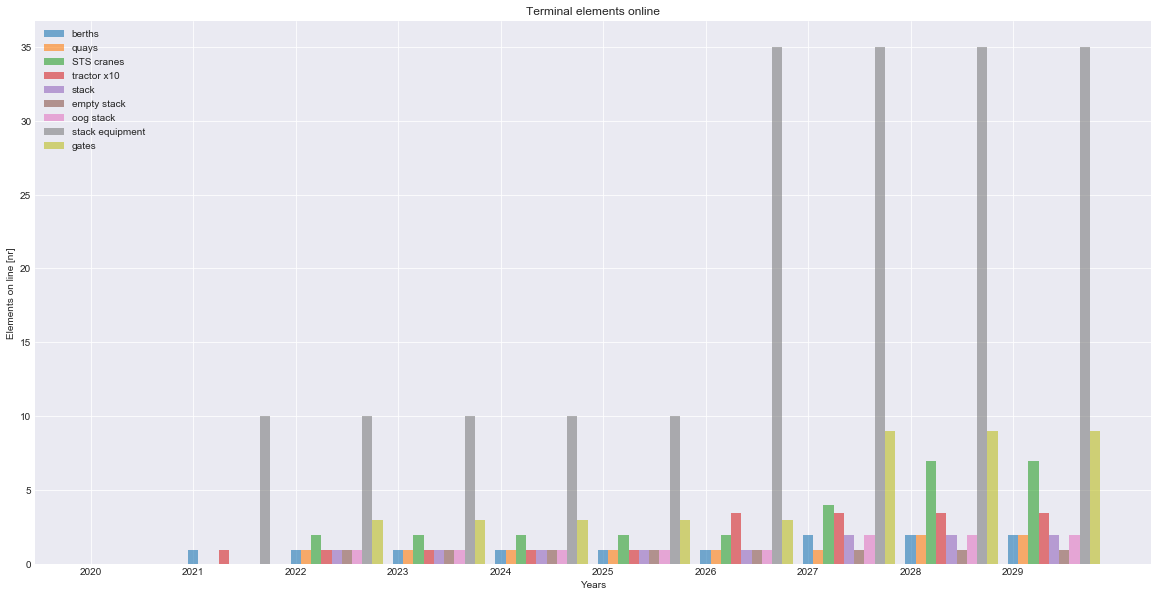

In [ ]:
Terminal.terminal_elements_plot()

In [ ]:
Terminal.land_use_plot()

In [ ]:
Terminal.terminal_capacity_plot()

In [ ]:
# add cash flow information for each of the Terminal elements
cash_flows, cash_flows_WACC_real = Terminal.add_cashflow_elements()

In [ ]:
Terminal.cashflow_plot(cash_flows)

In [ ]:

Terminal.cashflow_plot(cash_flows)

## SandBox

In [ ]:
Terminal.NPV()